In [1]:
#Name - Vidhu Shekhar Tripathi
#ID- 30488141


In [43]:
#ANS 1.1.1 

# Import SparkConf class into program
# Import SparkContext and SparkSession classes
from pyspark import SparkConf
from pyspark import SparkContext 
import os
import csv
from pyspark.sql import SparkSession
from pyspark.rdd import RDD
from pyspark.sql import functions as sf
from pandas import DataFrame



# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "DPTI APP "
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()

#Getting or instantiating a SparkContext

sc = SparkContext.getOrCreate(spark_conf)
sc.setLogLevel('ERROR')

In [32]:
# ANS 1.1.2 and 1.1.3
unit = []
crash = []
#Import all the .csv files for crash and units
for year in range(2015,2020):
    file_suffix = '_DATA_SA_Units.csv'
    file_name = str(year) + file_suffix
    with open(file_name) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            unit.append(row)
        

for year in range(2015,2020):
    file_suffix = '_DATA_SA_Crash.csv'
    file_name = str(year) + file_suffix
    with open(file_name) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            crash.append(row)
# Extract data into single rdd        
unit_rdd = sc.parallelize(unit)
crash_rdd = sc.parallelize(crash)

unit_header = unit_rdd.first()
crash_header = crash_rdd.first()

unit_rdd = unit_rdd.filter(lambda row: row != unit_header)
crash_rdd = crash_rdd.filter(lambda row: row != crash_header)



In [33]:
#Ans 1.1.4
print("Number of rows in crash RDD is :")
print(crash_rdd.count())
print("\n First 10 records are:")
crash_top_list = crash_rdd.take(10)

for record in crash_rdd.take(10):
    print("################################################")
    print(record)
    print("-------------------------------------------------")


Number of rows in crash RDD is :
72006

 First 10 records are:
################################################
['2015-1-21/08/2019', '2 Metropolitan', 'ELIZABETH VALE', '5112', 'CITY OF PLAYFORD.', '2', '1', '0', '0', '1', '2015', 'January', 'Wednesday', '01:00 pm', '060', 'T-Junction', 'Straight road', 'Level', 'Not Applicable', 'Sealed', 'Dry', 'Not Raining', 'Daylight', 'Side Swipe', '01', 'Driver Rider', '2: MI', 'No Control', '', '', '1335254.54', '1690056.88', '13352551690057']
-------------------------------------------------
################################################
['2015-2-21/08/2019', '2 Metropolitan', 'SALISBURY', '5108', 'CITY OF SALISBURY', '2', '1', '0', '0', '1', '2015', 'February', 'Tuesday', '03:38 pm', '060', 'Cross Road', 'Straight road', 'Level', 'Not Applicable', 'Sealed', 'Dry', 'Not Raining', 'Daylight', 'Rear End', '01', 'Driver Rider', '2: MI', 'Traffic Signals', '', '', '1333389.6', '1688248.34', '13333901688248']
-------------------------------------

In [34]:
print("Number of rows in units RDD is :")
print(unit_rdd.count())
print("\n First 10 records are : \n")
unit_top_list = unit_rdd.take(10)

for record in unit_rdd.take(10):
    print("################################################")
    print(record)
    print("-------------------------------------------------")


Number of rows in units RDD is :
153854

 First 10 records are : 

################################################
['2015-1-21/08/2019', '01', '0', 'SA', 'RIGID TRUCK LGE GE 4.5T', '1999', 'North East', 'Male', '052', 'SA', 'HRR ', 'Full', 'Not Towing', 'Swerving', '001', '5109', '', '']
-------------------------------------------------
################################################
['2015-1-21/08/2019', '02', '1', 'SA', 'Motor Cars - Sedan', '2009', 'North East', 'Female', '057', 'SA', 'C ', 'Full', 'Not Towing', 'Straight Ahead', '002', '5125', '', '']
-------------------------------------------------
################################################
['2015-2-21/08/2019', '01', '0', 'SA', 'Motor Cars - Sedan', '2009', 'South East', 'Male', '020', 'SA', 'MR', 'Provisional 1 ', 'Not Towing', 'Straight Ahead', '001', '5110', '', '']
-------------------------------------------------
################################################
['2015-2-21/08/2019', '02', '1', 'SA', 'Motor Cars - Se

In [35]:
#ANS 1.2.1
# Function to display partition size 
def partition_data(data):
    if isinstance(data, RDD):
        numPartitions = data.getNumPartitions()
        partitions = data.glom().collect()
    else:
        numPartitions = data.rdd.getNumPartitions()
        partitions = data.rdd.glom().collect()
    
    print("Number of partition  :", numPartitions)
    for index, partition in enumerate(partitions):
        if len(partition) > 0:
            print("Partition size :" ,len(partition))
print("UNIT DATA\n")
partition_data(unit_rdd)
print("\n CRASH DATA\n")
partition_data(crash_rdd)

UNIT DATA

Number of partition  : 2
Partition size : 76797
Partition size : 77057

 CRASH DATA

Number of partition  : 2
Partition size : 35837
Partition size : 36169


In [36]:
#Ans 1.2.2.a
key_pair_rdd = unit_rdd.map(lambda x: (x[9], (x[0:8],x[10:])))
# Ans 1.2.2.b
def partition_function(key):
    key_State = 'SA'
    index=0
    if (str(key) != str(key_State)):
        index=1
    return index

lic_partitioned_unit_rdd = key_pair_rdd.partitionBy(2, partition_function)
lic_partitioned_unit_rdd.take(2)

[('SA',
  (['2015-1-21/08/2019',
    '01',
    '0',
    'SA',
    'RIGID TRUCK LGE GE 4.5T',
    '1999',
    'North East',
    'Male'],
   ['HRR ', 'Full', 'Not Towing', 'Swerving', '001', '5109', '', ''])),
 ('SA',
  (['2015-1-21/08/2019',
    '02',
    '1',
    'SA',
    'Motor Cars - Sedan',
    '2009',
    'North East',
    'Female'],
   ['C ', 'Full', 'Not Towing', 'Straight Ahead', '002', '5125', '', '']))]

In [37]:
#Ans 1.2.2.c
partition_data(lic_partitioned_unit_rdd)

Number of partition  : 2
Partition size : 109684
Partition size : 44170


### The number of records in each of the partition for both the dataset Units and Crashes are uniform

In [38]:
#Ans1.3.1
gender_list = ['Male','Female']

for gender in gender_list:
    gender_age_rdd = unit_rdd.filter(lambda x: x[7] == str(gender) and x[8] != 'XXX'
                                    and x[8] != '').map(lambda field: int(field[8]))
    result_avg_age = gender_age_rdd.mean()
    print("Average age of " + str(gender)+ " drivers is :")
    print(str(result_avg_age))
    print("======================")

Average age of Male drivers is :
40.97596029992013
Average age of Female drivers is :
40.387292688624235


In [39]:
#Ans 1.3.2
year_rdd = unit_rdd.filter(lambda x: x[5] != 'XXXX' and x[5] != '').map(lambda field: (int(field[5]),field[3],field[4]))
oldest_veh = year_rdd.min()
print("oldest vehicle : "+str(oldest_veh[0])+"\n")
print("Registration state : "+str(oldest_veh[1]))
print("Unit type  : "+str(oldest_veh[2]+"\n"))
newest_veh = year_rdd.max()
print("newest vehicle : "+str(newest_veh[0])+"\n")
print("Registration state  : "+str(newest_veh[1]))
print("Unit type: "+str(newest_veh[2]))

oldest vehicle : 1900

Registration state : SA
Unit type  : Motor Cycle

newest vehicle : 2019

Registration state  : VIC
Unit type: Utility


### Part 2:  Working with DataFrames

In [44]:
#ANS 2
#ANS 2.1
df_unit = spark.read.format('csv')\
                .option('header',True)\
                .load('*_DATA_SA_Units.csv')

df_unit.createOrReplaceTempView("sql_events")
df_crash = spark.read.format('csv')\
                .option('header',True)\
                .load('*_DATA_SA_Crash.csv')

df_unit.createOrReplaceTempView("sql_events")
print_partitions(df_unit)
df_unit.printSchema()
print_partitions(df_crash)
df_crash.printSchema()

Number of partition  : 2
Partition size : 68945
Partition size : 84909
root
 |-- REPORT_ID: string (nullable = true)
 |-- Unit No: string (nullable = true)
 |-- No Of Cas: string (nullable = true)
 |-- Veh Reg State: string (nullable = true)
 |-- Unit Type: string (nullable = true)
 |-- Veh Year: string (nullable = true)
 |-- Direction Of Travel: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Lic State: string (nullable = true)
 |-- Licence Class: string (nullable = true)
 |-- Licence Type: string (nullable = true)
 |-- Towing: string (nullable = true)
 |-- Unit Movement: string (nullable = true)
 |-- Number Occupants: string (nullable = true)
 |-- Postcode: string (nullable = true)
 |-- Rollover: string (nullable = true)
 |-- Fire: string (nullable = true)

Number of partition  : 2
Partition size : 32206
Partition size : 39800
root
 |-- REPORT_ID: string (nullable = true)
 |-- Stats Area: string (nullable = true)
 |-- Suburb: string

In [45]:
# Ans 2.2
df_crash_ADE = df_crash.filter(df_crash["LGA Name"] == "CITY OF PORT ADELAIDE ENFIELD")\
                        .filter(df_crash["Total Cas"] >= 3)

print(df_crash_ADE.count())
print_partitions(df_crash_ADE)
df_crash_ADE.show()


66
Number of partition  : 2
Partition size : 25
Partition size : 41
+--------------------+--------------+-----------------+--------+--------------------+-----------+---------+----------+--------+--------+----+---------+--------+--------+----------+-------------+-----------------+--------------+--------------------+------------+-------------+------------+--------+----------------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+
|           REPORT_ID|    Stats Area|           Suburb|Postcode|            LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|    Month|     Day|    Time|Area Speed|Position Type| Horizontal Align|Vertical Align|          Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight|      Crash Type|Unit Resp| Entity Code|CSEF Severity|  Traffic Ctrls|DUI Involved|Drugs Involved|  ACCLOC_X|  ACCLOC_Y|    UNIQUE_LOC|
+--------------------+--------------+-----------------+--------+--

In [46]:

highest_CAS_df = df_crash.withColumn('Date', sf.concat(sf.col('Year'),
                                    sf.lit(' '),sf.col('Month'),sf.lit(' '),sf.col('Day')))\
                            .drop(*['Year','Month','Day'])\
                            .sort("Total Cas", ascending = False)

print("### 10 crash events with highest casualties are :\n")
for record in highest_CAS_df.take(10):
    print("################################################")
    print(record)
    print("-------------------------------------------------")


### 10 crash events with highest casualties are :

################################################
Row(REPORT_ID='2016-3035-15/08/2019', Stats Area='2 Metropolitan', Suburb='HACKHAM', Postcode='5163', LGA Name='CITY OF ONKAPARINGA', Total Units='3', Total Cas='9', Total Fats='3', Total SI='5', Total MI='1', Time='11:50 am', Area Speed='080', Position Type='T-Junction', Horizontal Align='Straight road', Vertical Align='Level', Other Feat='Not Applicable', Road Surface='Sealed', Moisture Cond='Dry', Weather Cond='Not Raining', DayNight='Daylight', Crash Type='Right Turn', Unit Resp='01', Entity Code='Driver Rider', CSEF Severity='4: Fatal', Traffic Ctrls='No Control', DUI Involved=None, Drugs Involved=None, ACCLOC_X='1320361.49', ACCLOC_Y='1645195.63', UNIQUE_LOC='13203611645196', Date='2016 January Saturday')
-------------------------------------------------
################################################
Row(REPORT_ID='2016-6630-15/08/2019', Stats Area='2 Metropolitan', Suburb='KANGA

In [47]:
total_fatalities_df = df_crash.groupBy('Crash Type')\
                                .agg(sf.sum('Total Fats').alias("Total Fatalities"))

total_fatalities_df.show()

+--------------------+----------------+
|          Crash Type|Total Fatalities|
+--------------------+----------------+
|           Roll Over|            57.0|
|  Hit Object on Road|             2.0|
|      Hit Pedestrian|            70.0|
|    Hit Fixed Object|           152.0|
|               Other|             2.0|
|          Side Swipe|            20.0|
|             Head On|            86.0|
|  Hit Parked Vehicle|             9.0|
|          Right Turn|            18.0|
|            Rear End|            16.0|
|          Hit Animal|             4.0|
|Left Road - Out o...|             1.0|
|         Right Angle|            45.0|
+--------------------+----------------+



In [48]:
Casualties_per_suburb = df_unit.join(df_crash,df_unit.REPORT_ID==df_crash.REPORT_ID,how='inner')\
                                .filter(df_unit['Licence Type'] == 'Unlicenced')\
                                .groupBy('Suburb').agg(sf.sum('No of Cas').alias("Total Casualties"))
Casualties_per_suburb.show()

+-------------------+----------------+
|             Suburb|Total Casualties|
+-------------------+----------------+
|      FLINDERS PARK|             4.0|
|       POOGINAGORIC|             1.0|
|     TEA TREE GULLY|             1.0|
|            HACKHAM|             3.0|
|   MEDINDIE GARDENS|             0.0|
|           WISANGER|             1.0|
|            CUMMINS|             0.0|
|       BASKET RANGE|             0.0|
|MURRAY BRIDGE SOUTH|             0.0|
|      GILLES PLAINS|             6.0|
|             HAWKER|             0.0|
|           BEAUFORT|             1.0|
|             MAGILL|             4.0|
|            ECHUNGA|             1.0|
|            CULTANA|             1.0|
|        EDWARDSTOWN|             3.0|
|        RISDON PARK|             1.0|
|          THORNGATE|             0.0|
|       ANDREWS FARM|            10.0|
|       TORRENSVILLE|             3.0|
+-------------------+----------------+
only showing top 20 rows



In [89]:
#Ans 2.3.1
crash_severity_df = df_crash.groupBy('CSEF Severity')\
                            .agg(sf.count('REPORT_ID').alias('Count'))
crash_severity_df.show()

+-------------+-----+
|CSEF Severity|Count|
+-------------+-----+
|     4: Fatal|  451|
|        2: MI|21881|
|       1: PDO|46696|
|        3: SI| 2978|
+-------------+-----+



In [90]:
def add_percentage_col(df):
    try:
        total = df.agg(sf.sum('Count')).collect()[0][0]
        df = df.withColumn('Percentage',(100/total)*sf.col('Count'))
    except TypeError:
        df = df.withColumn('Percentage',sf.col('Count'))
    return df


In [91]:
crash_severity_drugs = df_crash.filter(df_crash['Drugs Involved'] == 'Y')\
                            .groupBy('CSEF Severity')\
                            .agg(sf.count('REPORT_ID').alias('Count'))

crash_severity_drugs = add_percentage_col(crash_severity_drugs)
crash_severity_drugs.show()

+-------------+-----+------------------+
|CSEF Severity|Count|        Percentage|
+-------------+-----+------------------+
|     4: Fatal|   82| 6.539074960127592|
|        2: MI|  749| 59.72886762360447|
|       1: PDO|  176|14.035087719298247|
|        3: SI|  247|  19.6969696969697|
+-------------+-----+------------------+



In [92]:
#Ans 2.3.2.A

crash_severity_alcohol = df_crash.filter(df_crash['DUI Involved'] == 'Y')\
                            .groupBy('CSEF Severity')\
                            .agg(sf.count('REPORT_ID').alias('Count'))
crash_severity_alcohol = add_percentage_col(crash_severity_alcohol)
crash_severity_alcohol.show()

+-------------+-----+------------------+
|CSEF Severity|Count|        Percentage|
+-------------+-----+------------------+
|     4: Fatal|   79|3.5142348754448403|
|        2: MI|  737|  32.7846975088968|
|       1: PDO| 1173|52.179715302491104|
|        3: SI|  259|11.521352313167261|
+-------------+-----+------------------+



In [93]:
#Ans 2.3.2.B

crash_severity_both = df_crash.filter(df_crash['Drugs Involved'] == 'Y')\
                            .filter(df_crash['DUI Involved'] == 'Y')\
                            .groupBy('CSEF Severity')\
                            .agg(sf.count('REPORT_ID').alias('Count'))
crash_severity_both = add_percentage_col(crash_severity_both)
crash_severity_both.show()

+-------------+-----+------------------+
|CSEF Severity|Count|        Percentage|
+-------------+-----+------------------+
|     4: Fatal|   27|15.428571428571427|
|        2: MI|   89|50.857142857142854|
|       1: PDO|   24|13.714285714285714|
|        3: SI|   35|              20.0|
+-------------+-----+------------------+



In [94]:
#Ans 2.3.2.C
crash_severity_none = df_crash.filter(df_crash['Drugs Involved'] == 'null')\
                            .filter(df_crash['DUI Involved'] == 'null')\
                            .groupBy('CSEF Severity')\
                            .agg(sf.count('REPORT_ID').alias('Count'))
crash_severity_none = add_percentage_col(crash_severity_none)
crash_severity_none.show()

+-------------+-----+----------+
|CSEF Severity|Count|Percentage|
+-------------+-----+----------+
+-------------+-----+----------+



+-------------+-----------+-----------------+-------------------+----------------+----------+
|CSEF Severity|Total_Count|Crash_Drugs_Count|Crash_Alcohol_Count|Crash_Both_Count|None_Count|
+-------------+-----------+-----------------+-------------------+----------------+----------+
|     4: Fatal|        451|               82|                 79|              27|      null|
|        2: MI|      21881|              749|                737|              89|      null|
|       1: PDO|      46696|              176|               1173|              24|      null|
|        3: SI|       2978|              247|                259|              35|      null|
+-------------+-----------+-----------------+-------------------+----------------+----------+



<AxesSubplot:xlabel='CSEF Severity'>

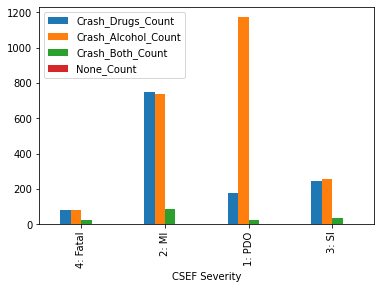

In [120]:
#Ans 2.3.2.D
new_df = crash_severity_df.select(sf.col('CSEF Severity'),sf.col('Count').alias('Total_Count'))\
        .join(crash_severity_drugs.select(sf.col('CSEF Severity'),sf.col('Count').alias('Crash_Drugs_Count')),
              on=['CSEF Severity'], how='left_outer')\
        .join(crash_severity_alcohol.select(sf.col('CSEF Severity'),sf.col('Count').alias('Crash_Alcohol_Count')),
              on=['CSEF Severity'], how='left_outer')\
        .join(crash_severity_both.select(sf.col('CSEF Severity'),sf.col('Count').alias('Crash_Both_Count')),
              on=['CSEF Severity'], how='left_outer')\
        .join(crash_severity_none.select(sf.col('CSEF Severity'),sf.col('Count').alias('None_Count')),
              on=['CSEF Severity'], how='left_outer')

new_df.show()
pdf = new_df.toPandas()
pdf.plot(x="CSEF Severity",y=["Crash_Drugs_Count","Crash_Alcohol_Count","Crash_Both_Count","None_Count"],kind="bar")

In [103]:
#ANS 2.4.1
%%time
df_crash_sub_ADE = df_crash.join(df_unit,df_crash.REPORT_ID == df_unit.REPORT_ID,how='inner')\
                            .withColumn('Date', sf.concat(sf.col('Year'),
                                    sf.lit(' '),sf.col('Month'),sf.lit(' '),sf.col('Day')))\
                            .select("Date","Time",sf.col("Total Cas").alias("Casualties"),
                                    sf.col("Sex").alias("Gender"),"Age","Licence Type","Suburb")\
                            .filter(df_crash['Suburb'] == 'ADELAIDE')

df_crash_sub_ADE.show()
df_crash_sub_ADE.count()

+--------------------+--------+----------+-------+----+------------+--------+
|                Date|    Time|Casualties| Gender| Age|Licence Type|  Suburb|
+--------------------+--------+----------+-------+----+------------+--------+
|2016 November Wed...|01:45 pm|         1|   Male| 072|        null|ADELAIDE|
|2016 November Wed...|01:45 pm|         1|   Male| 056|        Full|ADELAIDE|
|2016 November Tue...|03:40 pm|         1| Female| 027|        null|ADELAIDE|
|2016 November Tue...|03:40 pm|         1|   Male| 056|        null|ADELAIDE|
|2016 November Tue...|05:00 pm|         0|Unknown| XXX|     Unknown|ADELAIDE|
|2016 November Tue...|05:00 pm|         0| Female| 032|        Full|ADELAIDE|
|2016 November Tue...|05:40 pm|         0|   Male| 020|     Unknown|ADELAIDE|
|2016 November Tue...|05:40 pm|         0|   Male| 022|     Unknown|ADELAIDE|
|2016 November Monday|11:26 pm|         0|   null|null|        null|ADELAIDE|
|2016 November Monday|11:26 pm|         0|   Male| 042|        F

6310

In [104]:
%%time

rdd_crash_sub_ADE = crash_rdd.map(lambda x: (x[0],(x[2],x[6], x[10:14])))\
                            .join(unit_rdd.map(lambda x: (x[0], (x[7],x[8],x[11]))))\
                            .filter(lambda x: x[1][0][0] == 'ADELAIDE')\
                            .map(lambda x: (x[1][0][2][0:3],x[1][0][2][3],x[1][0][1],
                                                   x[1][1][0],x[1][1][1],x[1][1][2],x[1][0][0]))

rdd_crash_sub_ADE.collect()

CPU times: user 41.6 ms, sys: 5.64 ms, total: 47.2 ms
Wall time: 4.84 s


[(['2015', 'March', 'Friday'],
  '06:45 pm',
  '0',
  'Female',
  '020',
  'Provisional 2',
  'ADELAIDE'),
 (['2015', 'March', 'Friday'], '06:45 pm', '0', 'Male', 'XXX', '', 'ADELAIDE'),
 (['2015', 'March', 'Tuesday'],
  '08:26 am',
  '0',
  'Female',
  '051',
  'Full',
  'ADELAIDE'),
 (['2015', 'March', 'Tuesday'],
  '08:26 am',
  '0',
  'Female',
  '060',
  'Full',
  'ADELAIDE'),
 (['2015', 'March', 'Tuesday'],
  '08:45 am',
  '0',
  'Male',
  '030',
  'Full',
  'ADELAIDE'),
 (['2015', 'March', 'Tuesday'],
  '08:45 am',
  '0',
  'Unknown',
  'XXX',
  '',
  'ADELAIDE'),
 (['2015', 'March', 'Saturday'],
  '08:00 pm',
  '0',
  'Male',
  '042',
  'Full',
  'ADELAIDE'),
 (['2015', 'April', 'Tuesday'],
  '11:30 am',
  '0',
  'Female',
  '045',
  'Full',
  'ADELAIDE'),
 (['2015', 'April', 'Tuesday'],
  '11:30 am',
  '0',
  'Male',
  '020',
  '',
  'ADELAIDE'),
 (['2015', 'April', 'Sunday'],
  '01:30 pm',
  '2',
  'Male',
  '025',
  'Unknown',
  'ADELAIDE'),
 (['2015', 'April', 'Sunday'],
  

In [112]:
#Ans 2.4.2
%%time
Casualties_per_suburb = df_unit.join(df_crash,df_unit.REPORT_ID==df_crash.REPORT_ID,how='inner')\
                                .filter(df_unit['Licence Type'] == 'Unlicenced')\
                                .groupBy('Suburb').agg(sf.sum('No of Cas').alias("Total Casualties"))
Casualties_per_suburb.sort("Total Casualties", ascending=False).show()

+---------------+----------------+
|         Suburb|Total Casualties|
+---------------+----------------+
|      SALISBURY|            11.0|
|      DRY CREEK|            11.0|
|       PROSPECT|            11.0|
|        ENFIELD|            11.0|
|   ANDREWS FARM|            10.0|
| SALISBURY EAST|             8.0|
| ELIZABETH PARK|             8.0|
|SALISBURY DOWNS|             8.0|
|       ADELAIDE|             8.0|
|         BURTON|             8.0|
|  MOUNT GAMBIER|             7.0|
| NORTH ADELAIDE|             7.0|
|SALISBURY NORTH|             7.0|
|    COOBER PEDY|             7.0|
|  MURRAY BRIDGE|             6.0|
|  GILLES PLAINS|             6.0|
|   DAVOREN PARK|             6.0|
|ELIZABETH DOWNS|             6.0|
|    HOLDEN HILL|             6.0|
|          BURRA|             6.0|
+---------------+----------------+
only showing top 20 rows

CPU times: user 4.53 ms, sys: 7.45 ms, total: 12 ms
Wall time: 3.64 s


In [115]:
%%time
Casualties_by_suburb_rdd = unit_rdd.map(lambda x: (x[0],(x[2],x[11])))\
                                .join(crash_rdd.map(lambda x: (x[0],x[2])))\
                                .filter(lambda x: x[1][0][1]=='Unlicenced')\
                                .map(lambda x: (x[1][1],x[1][0][0],))\
                                .reduceByKey(lambda x,y: int(x)+int(y))\
                                .sortBy(lambda x:int(x[1]),ascending=False)
                                


Casualties_by_suburb_rdd.collect()

CPU times: user 79.8 ms, sys: 17.2 ms, total: 97 ms
Wall time: 4.88 s


[('PROSPECT', 11),
 ('SALISBURY', 11),
 ('ENFIELD', 11),
 ('DRY CREEK', 11),
 ('ANDREWS FARM', 10),
 ('ADELAIDE', 8),
 ('ELIZABETH PARK', 8),
 ('SALISBURY EAST', 8),
 ('SALISBURY DOWNS', 8),
 ('BURTON', 8),
 ('NORTH ADELAIDE', 7),
 ('SALISBURY NORTH', 7),
 ('MOUNT GAMBIER', 7),
 ('COOBER PEDY', 7),
 ('BEDFORD PARK', 6),
 ('DAVOREN PARK', 6),
 ('GILLES PLAINS', 6),
 ('BURRA', 6),
 ('HOLDEN HILL', 6),
 ('MORPHETT VALE', 6),
 ('MURRAY BRIDGE', 6),
 ('ELIZABETH DOWNS', 6),
 ('MAWSON LAKES', 5),
 ('TRANMERE', 5),
 ('ONKAPARINGA HILLS', 5),
 ('ELIZABETH SOUTH', 5),
 ('CHRISTIE DOWNS', 5),
 ('CURRENCY CREEK', 5),
 ('WHYALLA NORRIE', 5),
 ('MUNNO PARA', 5),
 ('MOUNT BARKER', 5),
 ('WATERLOO CORNER', 5),
 ('INGLE FARM', 5),
 ('ROSEWORTHY', 5),
 ('PARAFIELD GARDENS', 5),
 ('MEADOWS', 5),
 ('ELIZABETH GROVE', 5),
 ('ANGLE VALE', 4),
 ('PENFIELD', 4),
 ('GLENELG NORTH', 4),
 ('MAGILL', 4),
 ('SALISBURY PLAIN', 4),
 ('PLYMPTON', 4),
 ('WARRADALE', 4),
 ('PARA HILLS', 4),
 ('BROADVIEW', 4),
 ('EYRE'

In [108]:
df_unit.createOrReplaceTempView("crash_sql")
df_crash.createOrReplaceTempView("units_sql")


In [109]:
%%time

####Calculating using a sql
sql_suburb = spark.sql('''select Suburb, sum(`Total Cas`) as `Total Casualties` from crash_sql c, units_sql u 
where c.REPORT_ID = u.REPORT_ID and `Licence Type` == "Unlicenced"  Group by Suburb order by `Total Casualties` DESC ''')

###Displaying the final result
sql_suburb.show()

+---------------+----------------+
|         Suburb|Total Casualties|
+---------------+----------------+
|       ADELAIDE|            19.0|
|      SALISBURY|            18.0|
|      DRY CREEK|            18.0|
| SALISBURY EAST|            16.0|
|       PROSPECT|            14.0|
| NORTH ADELAIDE|            13.0|
|   ANDREWS FARM|            12.0|
|        ENFIELD|            12.0|
|SALISBURY DOWNS|            11.0|
|SALISBURY SOUTH|            11.0|
|     INGLE FARM|            11.0|
|   BEDFORD PARK|            11.0|
|   MOUNT BARKER|            10.0|
|SALISBURY PLAIN|            10.0|
|         BURTON|            10.0|
|     MUNNO PARA|            10.0|
| ELIZABETH PARK|            10.0|
|  MORPHETT VALE|            10.0|
|   MAWSON LAKES|            10.0|
|PARA HILLS WEST|             9.0|
+---------------+----------------+
only showing top 20 rows

CPU times: user 2.77 ms, sys: 302 µs, total: 3.07 ms
Wall time: 3.58 s
